In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df=pd.read_csv('/content/emails.csv')
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [48]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [49]:
df.shape

(5728, 2)

In [50]:
df.isna().sum()

text    0
spam    0
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [52]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [53]:
df.duplicated().sum()

33

In [54]:
df.drop_duplicates(inplace=True)

In [55]:
df.duplicated().sum()

0

In [56]:
df['spam'].value_counts()

0    4327
1    1368
Name: spam, dtype: int64

In [57]:
df['text']=df['text'].apply(lambda x:x.lower())

In [58]:
df.iloc[0].text

"subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

In [59]:
def splChar(text):
  new_text=""
  for i in text:
    if i.isalnum() or i==" ":
      new_text+=i
  return new_text

In [60]:
df['text']=df['text'].apply(splChar)

In [61]:
df['text'][0]

'subject naturally irresistible your corporate identity  lt is really hard to recollect a company  the  market is full of suqgestions and the information isoverwhelminq  but a good  catchy logo  stylish statlonery and outstanding website  will make the task much easier   we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader  it isguite ciear that  without good products  effective business organization and practicable aim it  will be hotat nowadays market  but we do promise that your marketing efforts  will become much more effective  here is the list of clear  benefits  creativeness  hand  made  original logos  specially done  to reflect your distinctive company image  convenience  logo and stationery  are provided in all formats  easy  to  use content management system letsyou  change your website content and even its structure  promptness  you  will see logo drafts within three business days  affordability  your  marketing break  through 

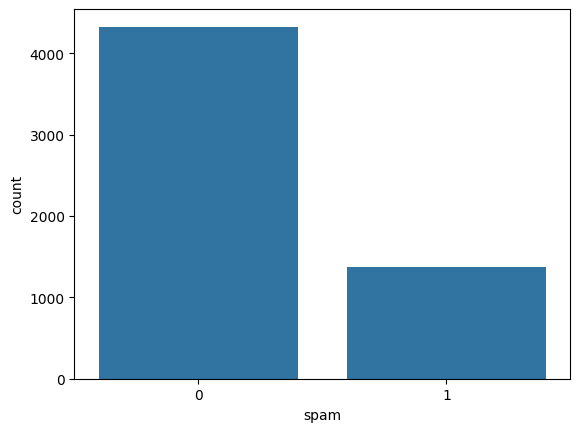

In [62]:
sns.countplot(x='spam',data=df)
plt.show()

In [63]:
from sklearn.feature_extraction.text import CountVectorizer

In [64]:
cv=CountVectorizer(stop_words='english',max_features=10000)

In [65]:
X=cv.fit_transform(df['text']).toarray()

In [66]:
y=df['spam'].values

In [67]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [69]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(4556, 10000)
(1139, 10000)
(1139,)
(4556,)


In [70]:
from sklearn.naive_bayes import MultinomialNB

In [71]:
clf=MultinomialNB()

In [72]:
clf.fit(X_train,y_train)

MultinomialNB()

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
y_pred=clf.predict(X_test)

In [75]:
accuracy_score(y_test,y_pred)

0.9868305531167691

In [76]:
from sklearn.naive_bayes import GaussianNB

In [77]:
gnb=GaussianNB()

In [78]:
gnb.fit(X_train,y_train)

GaussianNB()

In [79]:
y_pred=gnb.predict(X_test)

In [80]:
accuracy_score(y_test,y_pred)

0.9464442493415277

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rfc=RandomForestClassifier()

In [83]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [84]:
y_pred=rfc.predict(X_test)

In [85]:
accuracy_score(y_test,y_pred)

0.9841966637401229

In [86]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(X_train,y_train)
y_pred=bnb.predict(X_test)
accuracy_score(y_test,y_pred)

0.9692712906057945

In [87]:
import pickle

In [88]:
pickle.dump(cv,open('cv.pkl','wb'))

In [89]:
pickle.dump(clf,open('clf.pkl','wb'))